In [4]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("C:\\Users\\HP\\Downloads\\ravdess_dm1_2223\\ravdess_features.csv")

In [6]:
del df["actor"]
del df["modality"]
del df["channels"]
del df["mfcc_mean"]
del df["mfcc_std"]
del df["mfcc_min"]
del df["mfcc_max"]
del df["sc_mean"]
del df["sc_std"]
del df["sc_min"]
del df["sc_max"]
del df["sc_kur"]
del df["sc_skew"]
del df["stft_mean"]
del df["stft_std"]
del df["stft_min"]
del df["stft_max"]
del df["stft_kur"]
del df["stft_skew"]
del df["mean"]
del df["std"]
del df["min"]
del df["max"]
del df["kur"]
del df["skew"]
del df["frame_rate"]
del df["sample_width"]
del df["frame_count"]
del df["frame_width"]

In [7]:
df['vocal_channel']=df['vocal_channel'].fillna(pd.Series((np.random.choice(["speech", "song"], p=[0.591, 1-0.591], size=len(df)))))

In [8]:
y=pd.DataFrame(df["vocal_channel"])

In [9]:
x=df.iloc[:,1:6]

In [10]:
x

,emotion,emotional_intensity,statement,repetition,sex
0,fearful,normal,Dogs are sitting by the door,2nd,F
1,angry,normal,Dogs are sitting by the door,1st,F
2,happy,strong,Dogs are sitting by the door,2nd,F
3,surprised,normal,Kids are talking by the door,1st,F
4,happy,strong,Dogs are sitting by the door,2nd,F
...,...,...,...,...,...
2447,calm,strong,Kids are talking by the door,1st,M
2448,calm,normal,Dogs are sitting by the door,1st,M
2449,sad,strong,Dogs are sitting by the door,2nd,M
2450,surprised,normal,Kids are talking by the door,1st,M


In [11]:
from sklearn.preprocessing import LabelEncoder 

label_encoder = LabelEncoder()

y = pd.DataFrame(label_encoder.fit_transform(y))
y.columns = ['vocal_channel']
y

C:\Users\HP\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,vocal_channel
0,1
1,1
2,1
3,1
4,0
...,...
2447,1
2448,1
2449,0
2450,1


In [12]:
from collections import Counter

counter=Counter(y["vocal_channel"])
counter

Counter({1: 1443, 0: 1009})

<AxesSubplot:title={'center':'vocal channel'}>

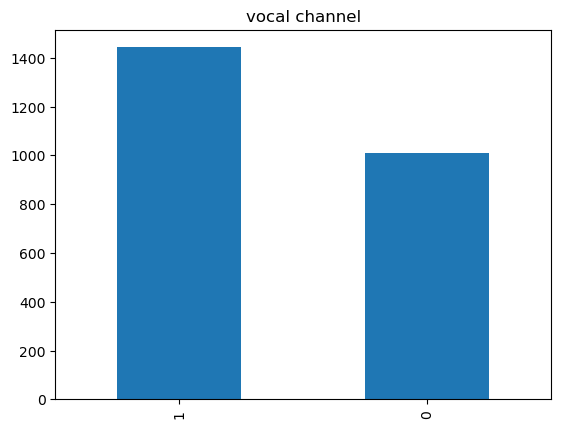

In [13]:
import matplotlib.pyplot as plt

plt.figure()
y['vocal_channel'].value_counts().plot(kind='bar', title='vocal channel')

In [14]:
dcx = pd.get_dummies(x)
X = df.values

In [15]:
Y=np.array(y)

In [16]:
y

,vocal_channel
0,1
1,1
2,1
3,1
4,0
...,...
2447,1
2448,1
2449,0
2450,1


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
dcx = pd.get_dummies(x)
X = df.values

In [19]:
dcx

,emotion_angry,emotion_calm,emotion_disgust,emotion_fearful,emotion_happy,emotion_neutral,emotion_sad,emotion_surprised,emotional_intensity_normal,emotional_intensity_strong,statement_Dogs are sitting by the door,statement_Kids are talking by the door,repetition_1st,repetition_2nd,sex_F,sex_M
0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0
1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
2,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0
3,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0
4,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1
2448,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1
2449,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1
2450,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    dcx, y, test_size=0.3, random_state=0
)

In [21]:
y_test

,vocal_channel
148,1
794,1
33,1
898,1
2183,1
...,...
564,1
294,0
1991,1
2097,1


# decision tree

In [22]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [23]:
num_figli=4
dt = DecisionTreeClassifier(max_depth=num_figli)

In [24]:
%%time
dt.fit(X_train, y_train)

Wall time: 4.4 ms


DecisionTreeClassifier(max_depth=4)

In [25]:
plot_tree?

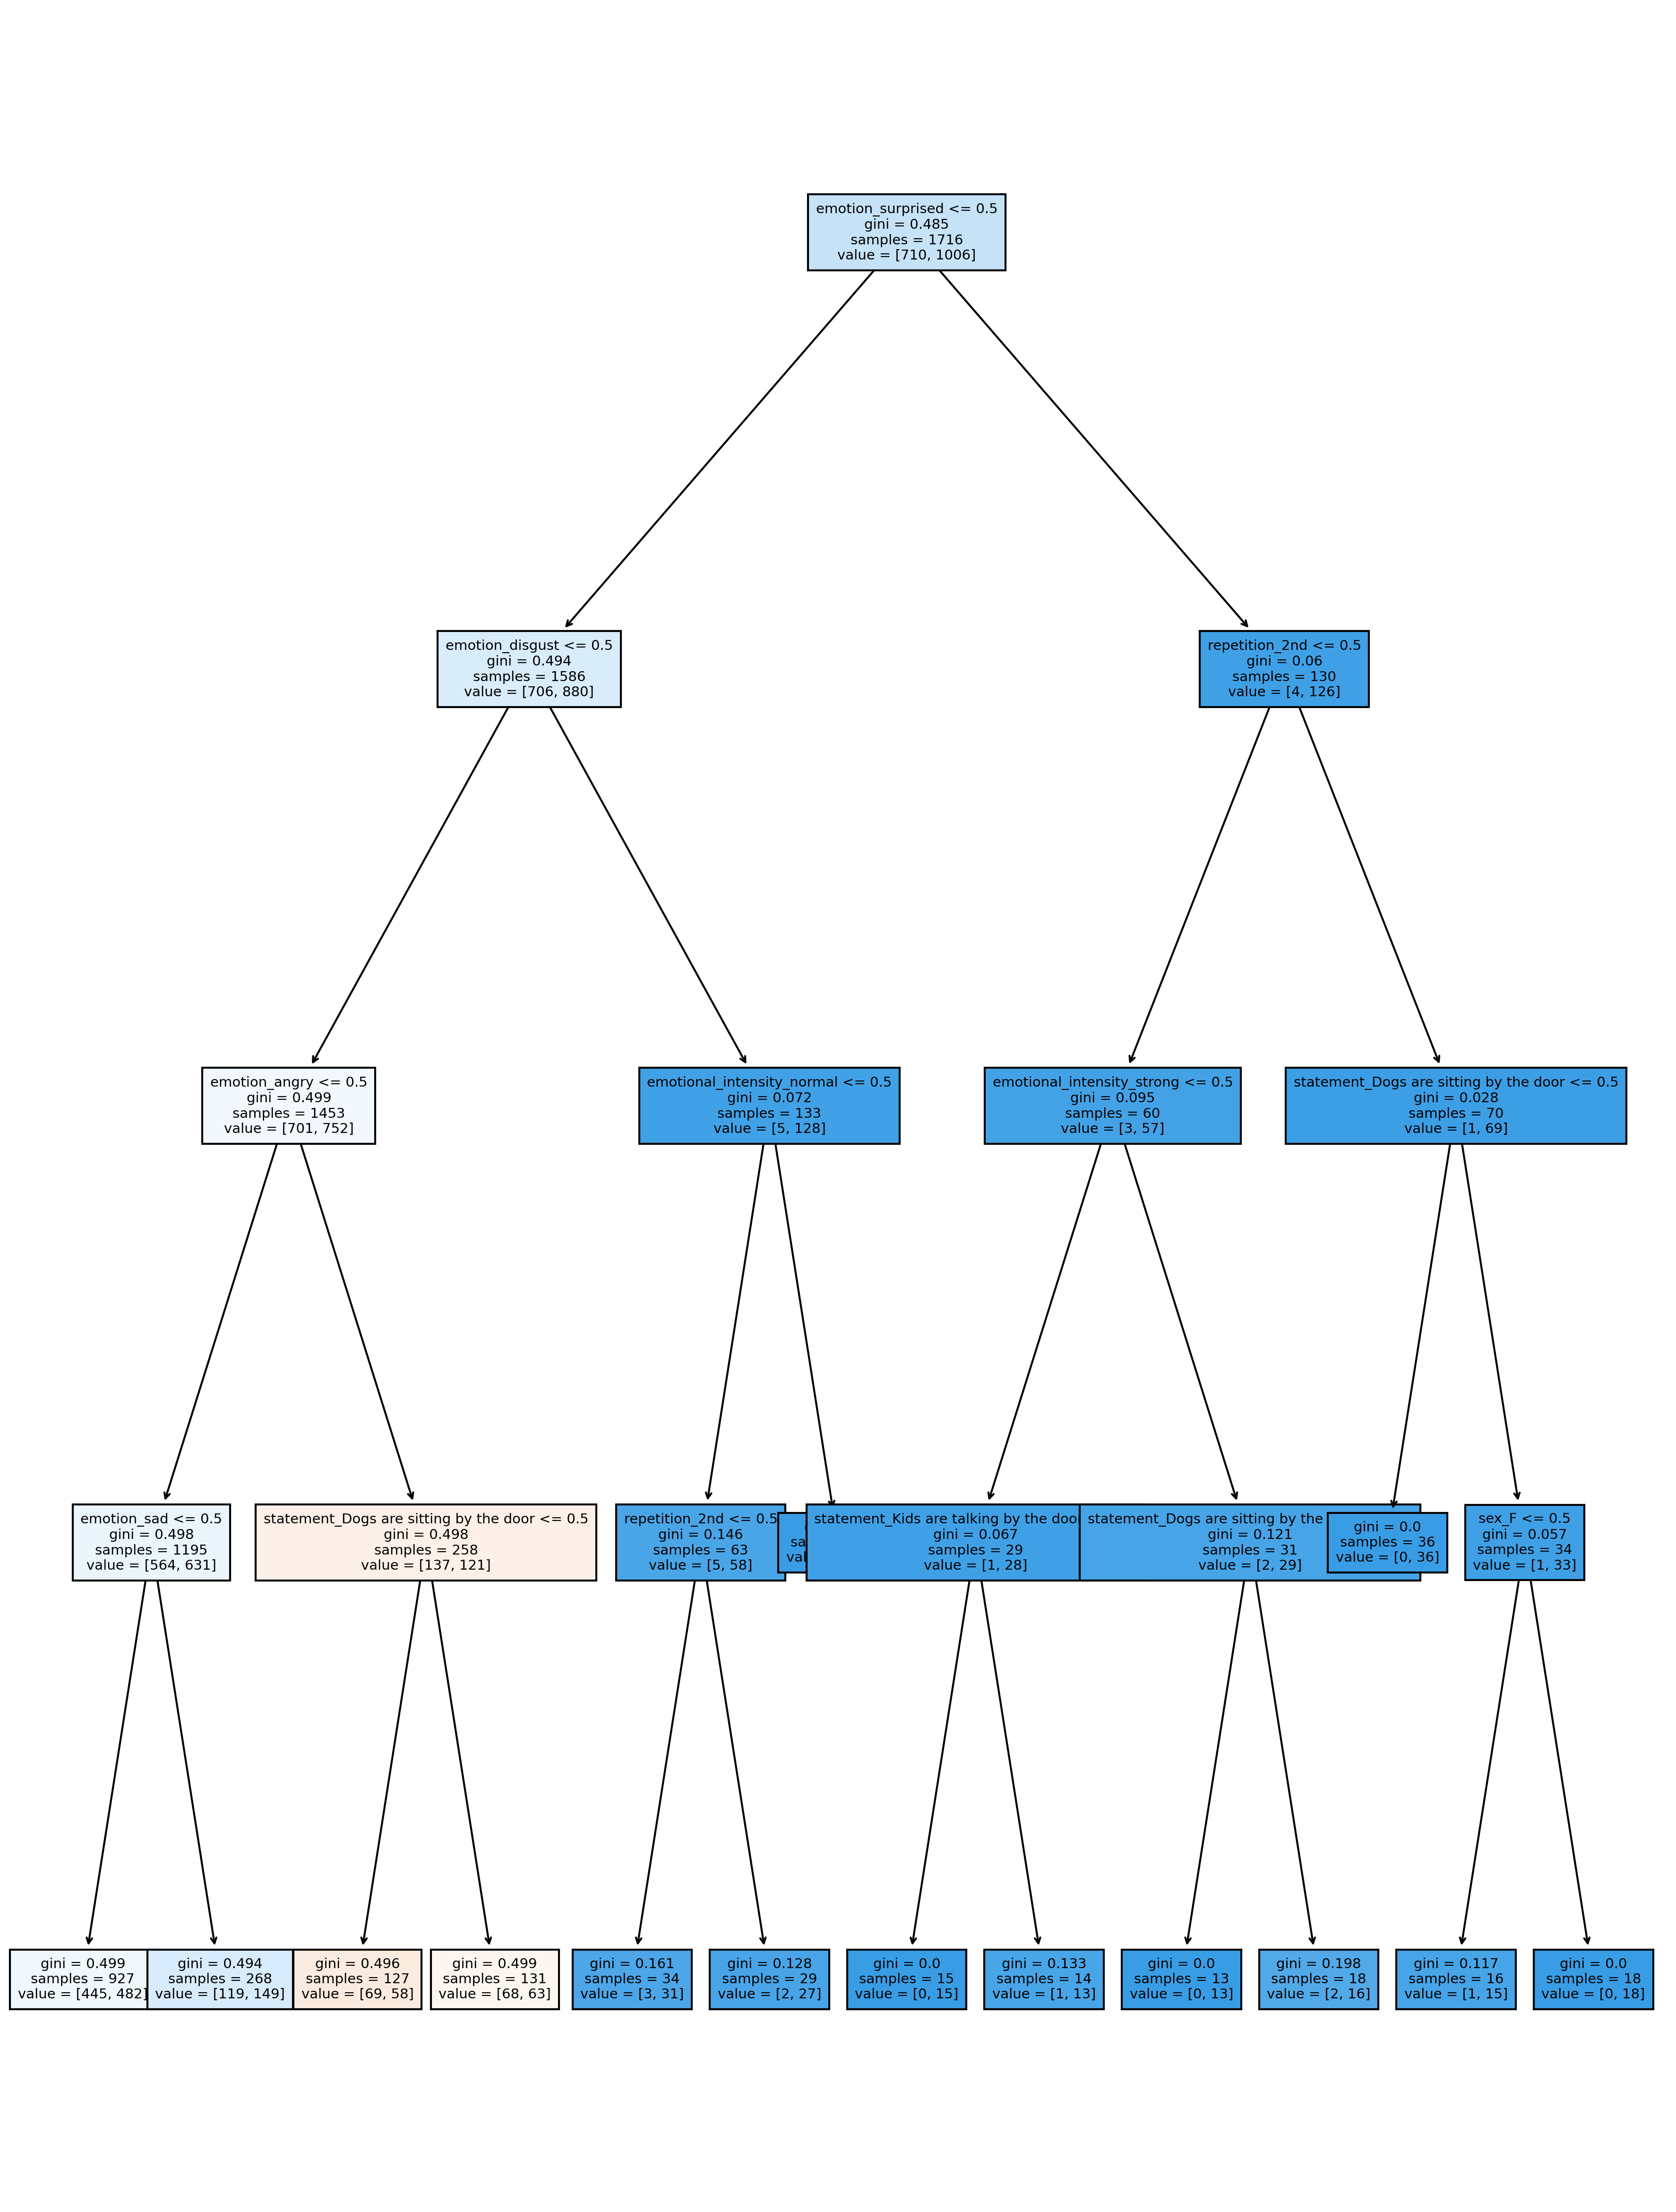

In [26]:
plt.figure(figsize=(15, 20), dpi=300)
plot_tree(dt, feature_names=dcx.columns, filled=True, fontsize=7)
plt.show()

#speech=1, song=0

In [27]:
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve
# plot_cumulative_gain and plot_lift_curve only work in a binary classification case

In [28]:
y_train_pred = dt.predict(X_train)
print(accuracy_score(y_train, y_train_pred))

0.5955710955710956


In [29]:
y_test_pred = dt.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(f1_score(y_test, y_test_pred, average="macro"))

0.5584239130434783
0.4562833145805631


In [30]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.39      0.15      0.22       299
           1       0.59      0.84      0.69       437

    accuracy                           0.56       736
   macro avg       0.49      0.49      0.46       736
weighted avg       0.51      0.56      0.50       736



C:\Users\HP\AppData\Local\Temp\ipykernel_4744\2776332961.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  CF= cf / cf.astype(np.float).sum(axis=1)


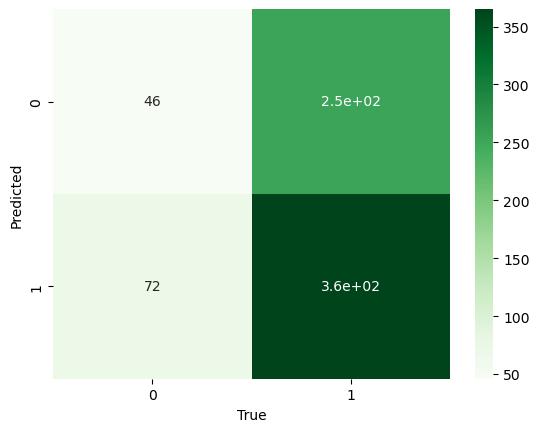

In [31]:
cf = confusion_matrix(y_test, y_test_pred)
CF= cf / cf.astype(np.float).sum(axis=1)
sns.heatmap(cf, annot=True, cmap="Greens")
plt.xlabel("True")
plt.ylabel("Predicted")
plt.show()

In [32]:
cf

array([[ 46, 253],
       [ 72, 365]], dtype=int64)

In [33]:
y_test_pred_proba = dt.predict_proba(X_test)

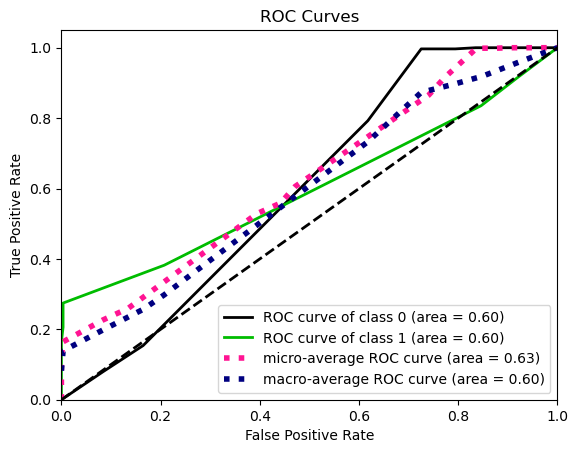

ValueError: y should be a 1d array, got an array of shape (736, 2) instead.

In [34]:
plot_roc(y_test, dt.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, y_test_pred_proba, multi_class="ovr", average="macro"))

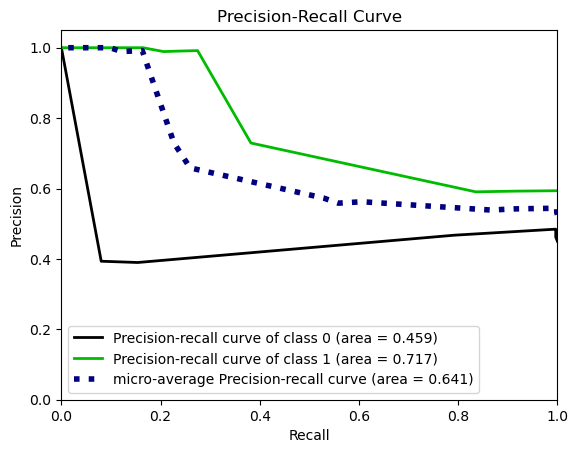

In [41]:
plot_precision_recall(y_test, dt.predict_proba(X_test))
plt.show()

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
max_depth = 2
dt = DecisionTreeClassifier(max_depth=max_depth)
scores = cross_val_score(dt, X_train, y_train, cv=5)
cross_val_score(dt, X_train, y_train, cv=5)

array([0.5872093 , 0.58600583, 0.58600583, 0.58600583, 0.58600583])

In [44]:
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std()))

Accuracy: 0.5862 (+/- 0.00)


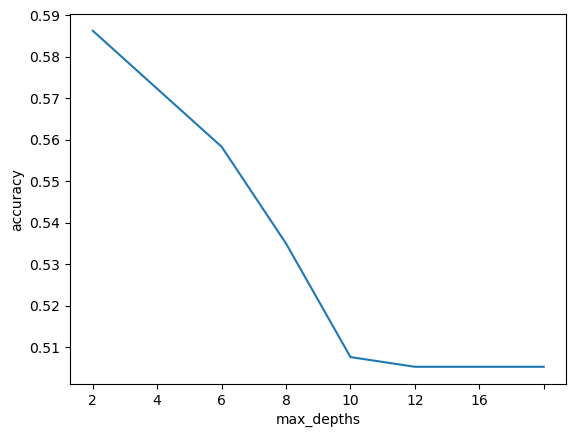

In [45]:
max_depths = [2, 4, 6, 8, 10, 12, 16, None]
scores = list()
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    scores.append(cross_val_score(dt, X_train, y_train, cv=5).mean())
plt.plot(scores)
plt.xticks(range(len(max_depths)), max_depths)
plt.xlabel("max_depths")
plt.ylabel("accuracy")
plt.show()

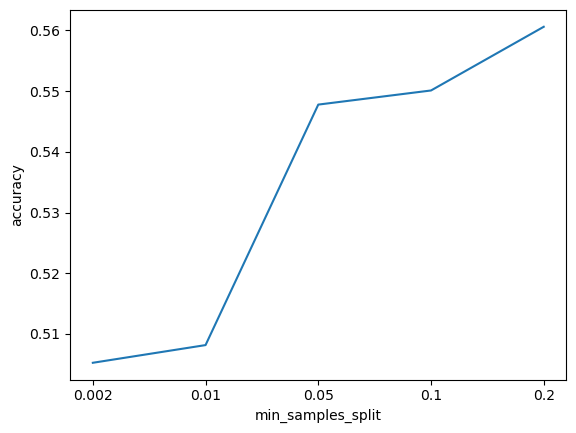

In [46]:
min_samples_splits = [0.002, 0.01, 0.05, 0.1, 0.2]
scores = list()
for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores.append(cross_val_score(dt, X_train, y_train, cv=5).mean())
plt.plot(scores)
plt.xticks(range(len(min_samples_splits)), min_samples_splits)
plt.xlabel("min_samples_split")
plt.ylabel("accuracy")
plt.show()

# grid search

In [47]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [48]:
param_grid = {
    "min_samples_split": [0.002, 0.01, 0.05, 0.1, 0.2],
    "min_samples_leaf": [0.001, 0.01, 0.05, 0.1, 0.2],
    "max_depth": [2, 4, 6, 8, 10, 12, 16, None],
}

grid = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid=param_grid,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=0),
    n_jobs=-1,
    refit=True,
)

In [49]:
%%time
grid.fit(X_train, y_train)

Wall time: 29 s


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=0),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12, 16, None],
                         'min_samples_leaf': [0.001, 0.01, 0.05, 0.1, 0.2],
                         'min_samples_split': [0.002, 0.01, 0.05, 0.1, 0.2]})

In [50]:
clf = grid.best_estimator_

In [51]:
print(grid.best_params_, grid.best_score_)

{'max_depth': 2, 'min_samples_leaf': 0.001, 'min_samples_split': 0.002} 0.5862465251881485


In [52]:
clf.score(X_test, y_test)

0.59375

In [53]:
from scipy.stats import uniform, randint, loguniform

In [54]:
%%time
param_grid = {
    "min_samples_split": loguniform(1e-2, 1e0),
    "min_samples_leaf": uniform(0.001, 0.2),
    "max_depth": randint(2, 200),
    "criterion": ["gini", "entropy", "log_loss"],
}
grid = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_distributions=param_grid,
    cv=RepeatedStratifiedKFold(random_state=0),
    n_jobs=-1,
    n_iter=200,
)
grid.fit(X_train, y_train)
clf = grid.best_estimator_

Wall time: 52.1 s


C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
4200 fits failed out of a total of 10000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4200 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_message

In [55]:
print(grid.best_params_, grid.best_score_)

{'criterion': 'entropy', 'max_depth': 97, 'min_samples_leaf': 0.19115298105693804, 'min_samples_split': 0.010460215882067764} 0.5862465251881485


In [56]:
clf.score(X_test, y_test)

0.59375

# naive bayes

In [57]:
from sklearn.naive_bayes import GaussianNB, CategoricalNB

In [58]:
clf = GaussianNB()

In [59]:
%%time
clf.fit(X_train, y_train)

Wall time: 4.74 ms


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [60]:
y_pred = clf.predict(X_test)

In [61]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65       299
           1       0.99      0.27      0.43       437

    accuracy                           0.57       736
   macro avg       0.74      0.64      0.54       736
weighted avg       0.79      0.57      0.52       736



In [62]:
clf.predict_proba(X_test)

array([[0.97121116, 0.02878884],
       [0.92903891, 0.07096109],
       [0.96309187, 0.03690813],
       ...,
       [0.92711685, 0.07288315],
       [0.95444413, 0.04555587],
       [0.92308557, 0.07691443]])

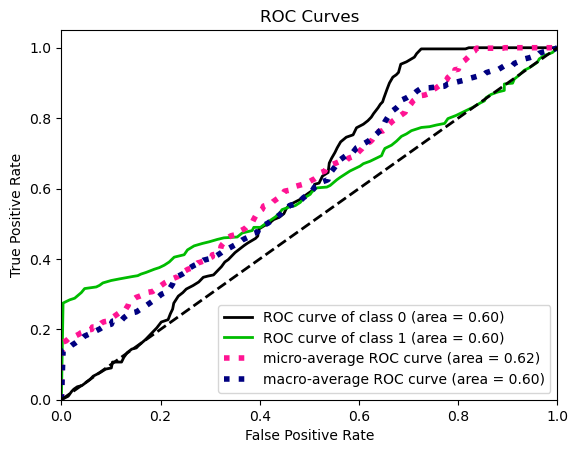

ValueError: y should be a 1d array, got an array of shape (736, 2) instead.

In [66]:
plot_roc(y_test, clf.predict_proba(X_test))
plt.show()
print(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class="ovr", average="macro"))

# KNN

In [67]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = []  
cv_scores = []  
    
from sklearn.model_selection import cross_val_score  


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

The optimal number of neighbors is  33 


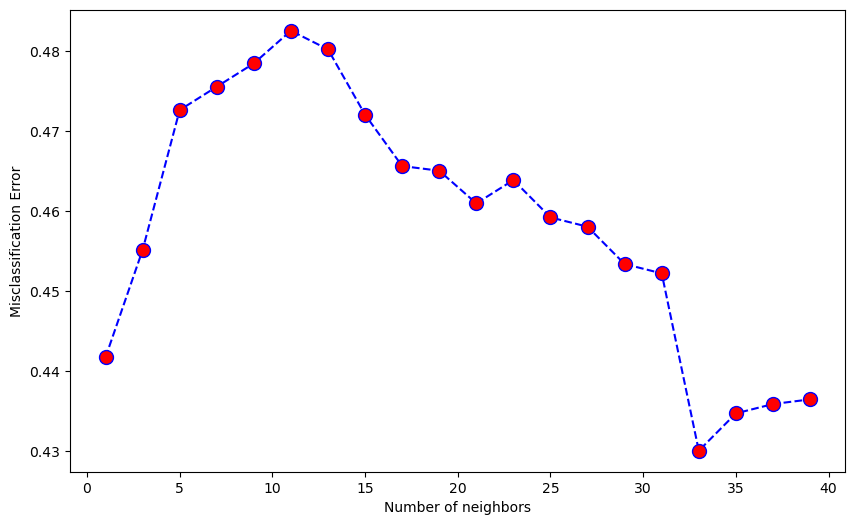

In [68]:
for k in range(1, 40, 2):  
    neighbors.append(k)  
    knn = KNeighborsClassifier(n_neighbors = k)  
    scores = cross_val_score(knn, X_train, y_train, cv = 4, scoring = 'accuracy')  
    cv_scores.append(scores.mean()) 
error_rate = [1-x for x in cv_scores]  
    
# determining the best k  
optimal_k = neighbors[error_rate.index(min(error_rate))]  
print('The optimal number of neighbors is % d ' % optimal_k)  
    
# plot misclassification error versus k  
plt.figure(figsize = (10, 6))  
plt.plot(range(1, 40, 2), error_rate, color ='blue', linestyle ='dashed', marker ='o', 
         markerfacecolor ='red', markersize = 10) 
plt.xlabel('Number of neighbors')  
plt.ylabel('Misclassification Error')  
plt.show() 

In [71]:
clf_kn = KNeighborsClassifier(n_neighbors= 39, weights= 'uniform') #'distance' -> n= 8 
clf_kn.fit(X_train,y_train)

scores = cross_val_score(clf_kn, X_train, y_train, cv=4)
print('Accuracy: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

scores = cross_val_score(clf_kn, X_train, y_train, cv=4, scoring='f1_macro')
print('F1-score: %0.4f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to av

Accuracy: 0.5635 (+/- 0.03)
F1-score: 0.4730 (+/- 0.04)


C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [72]:
from sklearn.metrics import plot_confusion_matrix

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Confusion matrix, without normalization
[[194 516]
 [173 833]]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Normalized confusion matrix
[[0.27323944 0.72676056]
 [0.17196819 0.82803181]]


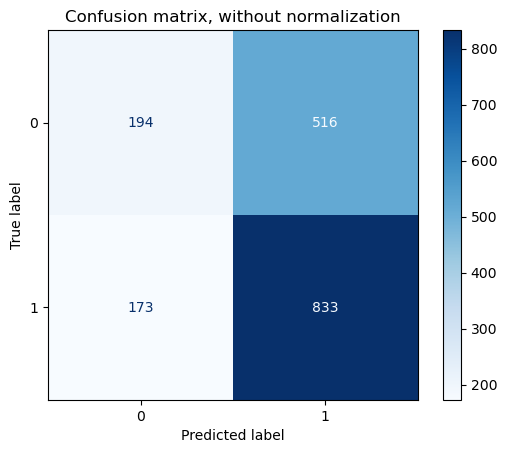

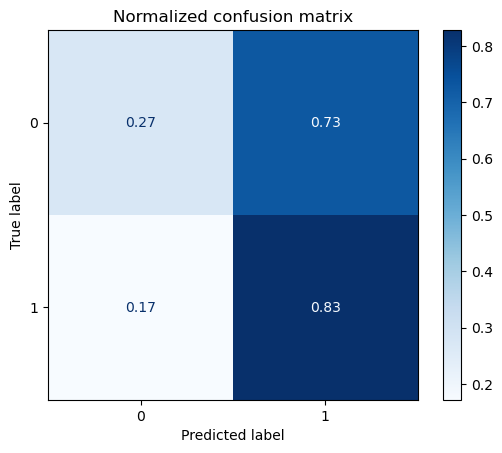

In [73]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_kn, X_train, y_train,
                                 display_labels=None,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# Pattern Mining

In [74]:
df

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,length_ms,intensity,zero_crossings_sum
0,speech,fearful,normal,Dogs are sitting by the door,2nd,F,3737,-36.793432,16995
1,speech,angry,normal,Dogs are sitting by the door,1st,F,3904,NaN,13906
2,speech,happy,strong,Dogs are sitting by the door,2nd,F,4671,-32.290737,18723
3,speech,surprised,normal,Kids are talking by the door,1st,F,3637,-49.019839,11617
4,song,happy,strong,Dogs are sitting by the door,2nd,F,4404,-31.214503,15137
...,...,...,...,...,...,...,...,...,...
2447,speech,calm,strong,Kids are talking by the door,1st,M,4605,NaN,9871
2448,speech,calm,normal,Dogs are sitting by the door,1st,M,4171,-43.342901,8963
2449,song,sad,strong,Dogs are sitting by the door,2nd,M,5239,NaN,9765
2450,speech,surprised,normal,Kids are talking by the door,1st,M,3737,-45.751265,9716


In [75]:
df["intensity"]=df["intensity"].fillna(pd.Series([np.random.normal(loc=df["intensity"].mean(), scale=df["intensity"].std()) for x in range(len(df))]))

In [76]:
df

,vocal_channel,emotion,emotional_intensity,statement,repetition,sex,length_ms,intensity,zero_crossings_sum
0,speech,fearful,normal,Dogs are sitting by the door,2nd,F,3737,-36.793432,16995
1,speech,angry,normal,Dogs are sitting by the door,1st,F,3904,-49.046352,13906
2,speech,happy,strong,Dogs are sitting by the door,2nd,F,4671,-32.290737,18723
3,speech,surprised,normal,Kids are talking by the door,1st,F,3637,-49.019839,11617
4,song,happy,strong,Dogs are sitting by the door,2nd,F,4404,-31.214503,15137
...,...,...,...,...,...,...,...,...,...
2447,speech,calm,strong,Kids are talking by the door,1st,M,4605,-41.915585,9871
2448,speech,calm,normal,Dogs are sitting by the door,1st,M,4171,-43.342901,8963
2449,song,sad,strong,Dogs are sitting by the door,2nd,M,5239,-38.193608,9765
2450,speech,surprised,normal,Kids are talking by the door,1st,M,3737,-45.751265,9716


In [77]:
df.dtypes

vocal_channel           object
emotion                 object
emotional_intensity     object
statement               object
repetition              object
sex                     object
length_ms                int64
intensity              float64
zero_crossings_sum       int64
dtype: object

In [78]:
dpm=df.iloc[:,0:5]

In [79]:
dpm

,vocal_channel,emotion,emotional_intensity,statement,repetition
0,speech,fearful,normal,Dogs are sitting by the door,2nd
1,speech,angry,normal,Dogs are sitting by the door,1st
2,speech,happy,strong,Dogs are sitting by the door,2nd
3,speech,surprised,normal,Kids are talking by the door,1st
4,song,happy,strong,Dogs are sitting by the door,2nd
...,...,...,...,...,...
2447,speech,calm,strong,Kids are talking by the door,1st
2448,speech,calm,normal,Dogs are sitting by the door,1st
2449,song,sad,strong,Dogs are sitting by the door,2nd
2450,speech,surprised,normal,Kids are talking by the door,1st


In [80]:
X = dpm.values.tolist()

# apriori

In [81]:
!pip install pyfim
from pyfim import apriori

  Using cached pyfim-6.28.tar.gz (357 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pyfim
Failed to build pyfim


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [1 lines of output]
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pyfim
ERROR: Could not build wheels for pyfim, which is required to install pyproject.toml-based projects


ModuleNotFoundError: No module named 'pyfim'

In [64]:
#frequent itemset
supp = 2  # 2%
supp = 20  # 20%
zmin = 2  # minimum number of items per item set

itemsets = apriori(X, minSup=2, minConf=None)
pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

NameError: name 'apriori' is not defined

In [ ]:
#closed itemset
supp = 2  # 2%
supp = 20  # 20%
zmin = 2  # minimum number of items per item set

itemsets = apriori(X, target="c", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["closed_itemset", "support"])

In [ ]:
#maximal itemset
itemsets = apriori(X, target="m", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["maximal_itemset", "support"])

In [ ]:
#support vs number of items
len_max_it = []
len_cl_it = []
max_supp = 25
for i in range(2, max_supp):
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
    cl_itemsets = apriori(X, target="c", supp=i, zmin=zmin)
    len_max_it.append(len(max_itemsets))
    len_cl_it.append(len(cl_itemsets))

plt.plot(np.arange(2, max_supp), len_max_it, label="maximal")
plt.plot(np.arange(2, max_supp), len_cl_it, label="closed")
plt.legend()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

In [ ]:
#Support vs number of itemset for speech / song
filter_1 = []
filter_2 = []
for i in range(2, max_supp):
    max_itemsets = apriori(X, target="m", supp=i, zmin=zmin)
    filter_1.append(len([item for item in max_itemsets if "speech" in item[0]]))
    filter_2.append(len([item for item in max_itemsets if "song" in item[0]]))

plt.plot(np.arange(2, max_supp), filter_1, label="w/ speech")
plt.plot(np.arange(2, max_supp), filter_2, label="w/ Not song")
plt.legend()
plt.xticks()
plt.xlabel("%support")
plt.ylabel("itemsets")

plt.show()

# fp growth

In [ ]:
from fim import fpgrowth

In [ ]:
supp = 2  # 2%
supp = 20  # 20%
zmin = 2  # minimum number of items per item set

itemsets = fpgrowth(X, target="s", supp=supp, zmin=zmin, report="S")
pd.DataFrame(itemsets, columns=["frequent_itemset", "support"])

In [ ]:
conf = 70
rules = fpgrowth(X, target="r", supp=supp, zmin=zmin, conf=conf, report="aScl")
pd.DataFrame(
    rules,
    columns=[
        "consequent",
        "antecedent",
        "abs_support",
        "%_support",
        "confidence",
        "lift",
    ],
)